<div style="background-color: black; color: white; padding: 10px;text-align: center;">
  <strong>Date Published:</strong> January 28, 2025 <strong>Author:</strong> Adnan Alaref
</div>

>**Neural Network classification with PyTorch**  
Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).
We will impelement PyTorch workflow in in the **image below** with classification task.

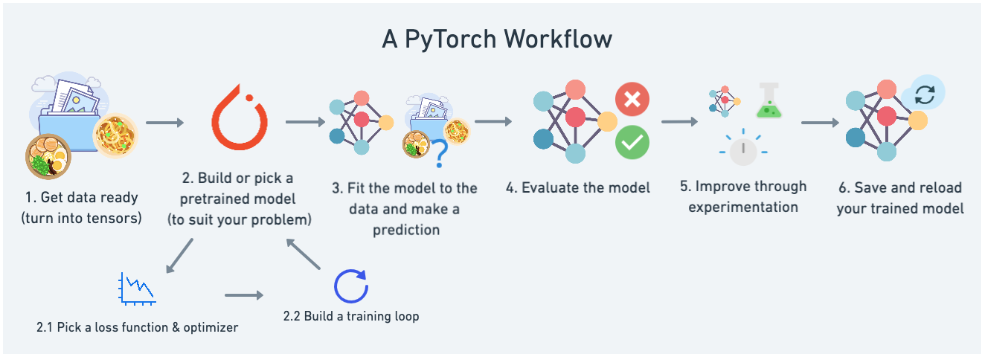

# **◍ Step 1: Import Librares.**

In [1]:
import torch
import numpy as np
import pandas as pd

from torch import nn
import seaborn as sns
from torch import optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
# Ignore all FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
torch.__version__

'2.5.1+cu121'

# **◍ Step 2: Create Classification Data.**

>**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

## **🔸 Step 2.1: Create Circles.**

In [3]:
# Make 1000 samples from circles
samples = 1000

# Create circles
X ,y = make_circles(n_samples= samples,
                                      noise = 0.03,
                                                  random_state = 42)

len(X) ,len(y) ,X.shape , y.shape , type(X) , type(y)

(1000, 1000, (1000, 2), (1000,), numpy.ndarray, numpy.ndarray)

In [4]:
# Print first five rows
X[:5] , y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

## **🔸 Step 2.2: Create DataFrame Of Circles Data.**

In [5]:
'''
Make DataFrame
Feature X1 include column 0 in X ,
Feature X2 include column 1 in X ,
Feature Label include y
'''
circles = pd.DataFrame({"X1" : X[:,0],
                        "X2" : X[:,1],
                        "Label": y})
circles.head()

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
# Check different labels
circles.Label.value_counts()

Label
1    500
0    500
Name: count, dtype: int64

**500 each, it's balanced.**

In [7]:
circles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   Label   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [8]:
circles.describe(include = "number")

,X1,X2,Label
count,1000.000000,1000.000000,1000.00000
mean,-0.000448,-0.000804,0.50000
std,0.639837,0.641156,0.50025
min,-1.059502,-1.067768,0.00000
25%,-0.619251,-0.612176,0.00000
50%,0.008762,-0.003949,0.50000
75%,0.621933,0.624822,1.00000
max,1.033712,1.036004,1.00000


## **🔸 Step 2.3: Let's Visulaize**

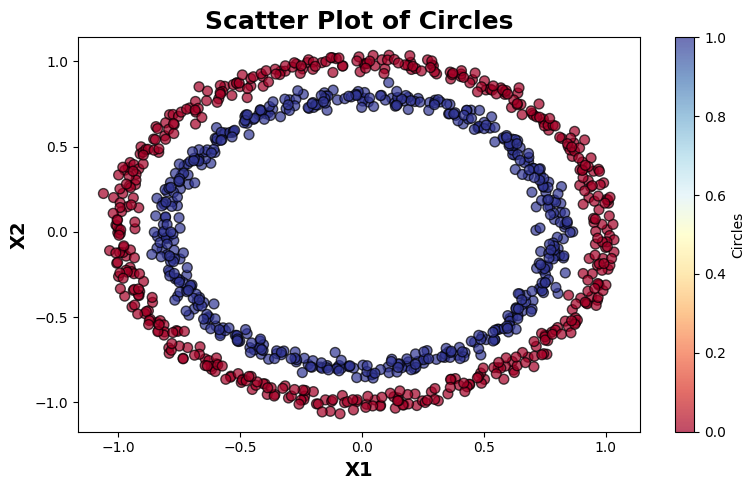

In [9]:
plt.figure(figsize = (8,5) ,dpi = 100)

# Scatter plot with enhancements
graph =  plt.scatter( x= circles['X1'],
                      y= circles['X2'],
                      c= circles['Label'],
                      cmap= plt.cm.RdYlBu,
                      alpha= 0.7,
                      edgecolors='k',
                      s = 50)

# Add colorbar to show the mapping of values to colors
plt.colorbar(graph , label = 'Circles')

# Add labels and title for better understanding
plt.xlabel('X1' ,fontsize = 14 ,fontweight = 'bold')
plt.ylabel('X2' ,fontsize = 14 ,fontweight = 'bold')
plt.title('Scatter Plot of Circles' ,fontsize = 18 ,fontweight = 'bold')

# Display the plot
plt.tight_layout()
plt.show()

## **🔸 Step 2.4: Turn Data Into Tensors.**

>**Note:** **There are two ways to do that `torch.from_numpy` & ` torch.tensor`.**  

**Differences Between torch.tensor and torch.from_numpy**

**Copy Behavior:**  
* **torch.from_numpy:** Shares memory with the original NumPy array. Changes in one affect the other.  
* **torch.tensor:** Creates a new tensor with a copy of the data. The resulting tensor is independent of the NumPy array.

**Flexibility:**
* **torch.tensor** allows you to **specify additional options** like `dtype` and `device` directly during the conversion:  
```tensor = torch.tensor(numpy_array, dtype=torch.float32, device='cuda')```


**Use Case:**  
* **Use torch.from_numpy** when you want to share memory between the NumPy array and the tensor.  
* **Use torch.tensor** when you need a new independent tensor or need to specify properties like dtype or device.

In [10]:
type(X) , type(y)

(numpy.ndarray, numpy.ndarray)

In [11]:
# Convert to PyTorch tensors
X_tensor = torch.from_numpy(X).type(torch.float)
y_tensor = torch.from_numpy(y).type(torch.long) # Note:
'''
Recall to convert it to float when you need to calculate loss function to avoid error.
(RuntimeError: result type Float can't be cast to the desired output type Long)
'''
X_tensor[:5] ,y_tensor[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1, 1, 1, 1, 0]))

In [12]:
print(f"The shape of the tensor is: {X_tensor.shape}")

The shape of the tensor is: torch.Size([1000, 2])


## **🔸 Step 2.5: Split Data Into Train and Test Sets.**

In [13]:
X_train ,X_test ,y_train ,y_test = train_test_split(X_tensor ,y_tensor ,test_size = 0.2 ,random_state = 42)
len(X_train) ,len(X_test) ,len(y_train) ,len(y_test)

(800, 200, 800, 200)

In [14]:
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_test : {y_test.shape}")
type(X_train) ,type(X_test) ,type(y_train) ,type(y_test)

X_train: torch.Size([800, 2])
y_train: torch.Size([800])
X_test : torch.Size([200, 2])
y_test : torch.Size([200])


(torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor)

# **◍ Step 3: Build Model.**

**Let's build a model to classify our blue and red dots.**

* Setup device agonistic code so our code will run on an accelerator (GPU).
* Construct a model (by subclassing nn.Module)
* Define a loss function and optimizer
* Create a training and test loop

In [15]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [16]:
# 1. Construct a model that subclasses nn.Module
class CircleModel_v1(nn.Module):
  def __init__(self):
    super(CircleModel_v1 ,self).__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.fc1 = nn.Linear(in_features = 2 ,out_features = 5) # Create first dense layer takes in 2 features and upscales to 5 features
    self.fc2 = nn.Linear(in_features = 5 ,out_features = 1) # Create output dense layer takes in 5 features from previous fc1 and outputs a single feature (same shape as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self ,x):
    # return self.fc2(self.fc1(x))# x -> fc1 ->  fc2 -> output
    x = self.fc1(x)
    x = self.fc2(x)
    return x

# 4. Instantiate an instance of our model class and send it to the target device
Circle_Model = CircleModel_v1().to(device = device)
Circle_Model

CircleModel_v1(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
next(Circle_Model.parameters()).device

device(type='cuda', index=0)

In [18]:
Circle_Model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-0.5111,  0.3250],
                      [ 0.6688, -0.6028],
                      [-0.6523,  0.1404],
                      [-0.6858, -0.0177],
                      [-0.2453,  0.2879]], device='cuda:0')),
             ('fc1.bias',
              tensor([-0.1100, -0.0193,  0.6504, -0.3407,  0.4848], device='cuda:0')),
             ('fc2.weight',
              tensor([[-0.3910,  0.2717,  0.1436, -0.1462,  0.2971]], device='cuda:0')),
             ('fc2.bias', tensor([-0.4359], device='cuda:0'))])

## **🔸 Step 3.1: Setup Loss Function and Optimizer.**

**Note:** Recall a loss function (**loss criterion or criterion**) is what measures how wrong your model predictions are, the higher the loss, the worse your model.  
For classification you might want **binary cross entropy** or **categorical cross entropy** (cross entropy).

**Our Problem is binary classification task so:**
* **PyTorch has two binary cross entropy implementations:**
   - **torch.nn.BCELoss()** - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
   - **torch.nn.BCEWithLogitsLoss()** - This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in.

* **Which one should you use?**
   1. **BCELoss.**
     - **When to use:** Use this when your model outputs probabilities (after applying a sigmoid activation in the last layer).
     - **Input:** Expects probabilities as input values (i.e., values between 0 and 1). These are usually obtained by applying a sigmoid activation function to your model's raw outputs (logits).
     - **Target:** Expects binary target values (0 or 1).
     - **Formula:** Computes the binary cross-entropy as:

    $$
      \text{Loss} = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right]
    $$
   2. **BCEWithLogitsLoss.**
     - **When to use:** Use this when your model outputs raw logits. It's
  computationally more stable and avoids issues with numerical precision that can arise when using BCELoss with separately applied sigmoid activation.  
    - **Input:** Expects raw logits (real-valued outputs from the last layer of the model, which have not been passed through a sigmoid function).
    - **Target:** Expects binary target values (0 or 1).
    - **Formula:** Combines a sigmoid activation internally with binary cross-entropy:
  $$
      \text{Loss} = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(\sigma(z_i)) + (1 - y_i) \cdot \log(1 - \sigma(z_i)) \right]
  $$
   3. **Why prefer BCEWithLogitsLoss over BCELoss?**
       - **Numerical Stability:** BCEWithLogitsLoss integrates the sigmoid and loss computation into a single operation, reducing the risk of numerical instability (e.g., when probabilities are very close to 0 or 1).

       - **Convenience:** It saves the step of explicitly applying the sigmoid activation, reducing the chance of coding errors.
   4. **Summary**  
       - Use **BCELoss** if your model output is already a probability (after applying sigmoid).
       - Use **BCEWithLogitsLoss** if your model outputs raw logits. This is generally recommended for most binary classification tasks.

**Note:** Recall **optimizers** are used to update the model parameters during training phase to minimize the loss function. They implement optimization algorithms like Stochastic Gradient Descent (SGD), Adam, RMSprop.

* **Commonly Used Optimizers in PyTorch:**
 * **torch.optim.SGD**
   - Implements stochastic gradient descent (optionally with momentum).
   - Useful for simpler tasks or when you want to implement custom variations of SGD.

 * **torch.optim.Adam**
   - Combines momentum (like RMSprop) with adaptive learning rates for each parameter.
   - Default choice for many deep learning tasks due to its efficiency and robustness.

 * **torch.optim.RMSprop**
   - Similar to Adam but without momentum correction, often used in recurrent neural networks (RNNs).

 * **torch.optim.Adagrad**
   - Adapts the learning rate for each parameter based on the history of gradients. Suitable for sparse data.

 * **torch.optim.AdamW**
   - Variant of Adam with decoupled weight decay for better regularization.

 * **torch.optim.ASGD**
   - Averaged stochastic gradient descent, often used in large datasets.

In [19]:
# Setup For Loss Function
criterion = torch.nn.BCEWithLogitsLoss()

# Setup For Optimizer
optimizer = torch.optim.SGD(Circle_Model.parameters() ,lr = 0.01 ,momentum=0.9)

**Find some logits**

In [20]:
Circle_Model.eval()
with torch.inference_mode():
  y_logits = Circle_Model(X_test.to(device))[:5]
y_logits

tensor([[-0.3538],
        [-0.2813],
        [-0.2749],
        [-0.3772],
        [ 0.1518]], device='cuda:0')

**From logits to propabilites using sigmoid.**

In [21]:
y_preds_props = torch.sigmoid(y_logits)
y_preds_props

tensor([[0.4125],
        [0.4301],
        [0.4317],
        [0.4068],
        [0.5379]], device='cuda:0')

**Get labels 0 and 1 from probabilites using round function.**

In [22]:
torch.round(y_preds_props.squeeze())

tensor([0., 0., 0., 0., 1.], device='cuda:0')

In [23]:
# All the same,I mean place [:n]
Circle_Model(X_test[:5].to(device))
Circle_Model(X_test.to(device)[:5])
Circle_Model(X_test.to(device))[:5]

tensor([[-0.3538],
        [-0.2813],
        [-0.2749],
        [-0.3772],
        [ 0.1518]], device='cuda:0', grad_fn=<SliceBackward0>)

**In Full (logits -> pred probs -> pred labels)**

In [24]:
y_preds_labels = torch.round(torch.sigmoid(Circle_Model(X_test.to(device))[:5]))
y_preds_labels.squeeze()

tensor([0., 0., 0., 0., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

**Build Accuracy Function**

In [25]:
def accuracy_fun(y_true ,y_preds):
  # toall_correct / total_samples
  total_corect = torch.eq(y_true ,y_preds).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (total_corect / len(y_preds)) *100
  return acc

## **🔸 Step 3.2: Build Traing Loop.**

In [26]:
# Set Seed
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# Number of epochs
epochs = 100

# Track model values
epochs_count1 = []
test_loss_values1 = []
train_loss_values1 = []

# Set data in target decive
X_train ,y_train = X_train.to(device) ,y_train.to(device)
X_test ,y_test  = X_test.to(device) ,y_test.to(device)

### Training Loop
for epoch in range(epochs):
  # Set Model In Traing Mode
  Circle_Model.train()

  # 1. Forward Pass
  train_logits = Circle_Model(X_train).squeeze()

  # Calculate train accuracy(y_true ,y_pred(logits -> propabilites -> labels))
  train_acc = accuracy_fun(y_train ,torch.round(torch.sigmoid(train_logits)))

  # 2. Calculate The loss (Input ,target)
  train_loss = criterion(train_logits ,y_train.to(float)) # Using nn.BCEWithLogitsLoss works with raw logits

  # 3. Optimizer zero_grad
  optimizer.zero_grad()

  # 4. Backpropagation Loss backword
  train_loss.backward()

  # 5.Optimizer step(gradent descent)
  optimizer.step()

  ### Testing
  # Set Model In Testing Mode
  Circle_Model.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_logits = Circle_Model(X_test).squeeze()

    # 2. Claculate Loss
    test_loss = criterion(test_logits ,y_test.to(float))

    # Calculate test accuracy(y_true ,y_pred(logits -> propabilites -> labels))
    test_acc = accuracy_fun(y_test , torch.round(torch.sigmoid(test_logits)))

  # Show resultes per epoch
  if epoch % 10 == 0:
    epochs_count1.append(epoch)
    test_loss_values1.append(test_loss.detach().cpu().numpy()) # !!! Note: Convert from tensor to numpy array .you can use directly tensor.cpu()
    train_loss_values1.append(train_loss.detach().cpu().numpy()) # !!! Note: Convert from tensor to numpy array
    print(f"Epoch: [{epoch+1}/{epochs}] - Train Accuracy: {train_acc:.3f}% - Train Loss: {train_loss:.3f} - Test Accuracy: {test_acc:.3f}% - Test Loss: {test_loss:.3f}")

Epoch: [1/100] - Train Accuracy: 49.750% - Train Loss: 0.702 - Test Accuracy: 46.000% - Test Loss: 0.701
Epoch: [11/100] - Train Accuracy: 50.125% - Train Loss: 0.700 - Test Accuracy: 46.500% - Test Loss: 0.698
Epoch: [21/100] - Train Accuracy: 50.375% - Train Loss: 0.697 - Test Accuracy: 46.000% - Test Loss: 0.696
Epoch: [31/100] - Train Accuracy: 50.625% - Train Loss: 0.695 - Test Accuracy: 47.500% - Test Loss: 0.694
Epoch: [41/100] - Train Accuracy: 50.125% - Train Loss: 0.694 - Test Accuracy: 51.000% - Test Loss: 0.694
Epoch: [51/100] - Train Accuracy: 50.125% - Train Loss: 0.694 - Test Accuracy: 53.500% - Test Loss: 0.694
Epoch: [61/100] - Train Accuracy: 50.125% - Train Loss: 0.693 - Test Accuracy: 53.500% - Test Loss: 0.693
Epoch: [71/100] - Train Accuracy: 50.375% - Train Loss: 0.693 - Test Accuracy: 53.500% - Test Loss: 0.693
Epoch: [81/100] - Train Accuracy: 50.125% - Train Loss: 0.693 - Test Accuracy: 53.000% - Test Loss: 0.693
Epoch: [91/100] - Train Accuracy: 50.750% - Tra

## **🔸 Step 3.3: Let's Visualize our model.**

📝 **Note:** we will use function `plot_decision_boundary()` this function had implemented by **Daniel Bourke** [helper_functions.py](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py)

In [27]:
import requests
from pathlib import Path

# Downloding helper function from git hub repo.
if Path("helper_function.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)

📝 **Note:** In Function **plot_decision_boundary**
* Behidn the seen we put everything to CPU (works better with NumPy + Matplotlib).
* We put `model.cpu()` ,`X_data.cpu()` and `y_data.cpu()` to avoid errors because **Matplotlib** work only with **CPU** not work with **GPU**.

In [28]:
def Display_Dcision_Boundary(Model ,X_train ,X_test ,y_train,y_test):
  from helper_function import plot_predictions ,plot_decision_boundary

  plt.figure(figsize=(10,5) ,dpi=100)
  plt.subplot(1,2,1)
  plt.title("Traning set" ,fontsize = 15 ,fontweight = 'bold')
  plot_decision_boundary(Model ,X_train ,y_train)
  # plt.axis('off')

  plt.subplot(1,2,2)
  plt.title("Testing set" ,fontsize = 15 ,fontweight = 'bold')
  plot_decision_boundary(Model ,X_test ,y_test)
  # plt.axis('off')

  plt.tight_layout()
  plt.show()

In [29]:
# Make Some prediction to diplay Confusion Matrix
def Find_Predictions(Model ,X_test):
  Model.eval()
  with torch.inference_mode():
    Model.to(device)
    logits = Model(X_test.to(device)).squeeze()
    y_preds = torch.round(torch.sigmoid(logits))
    y_props = torch.sigmoid(logits)
  return y_preds ,y_props

In [30]:
def Diplay_Confusion_Matrix(y_test ,y_preds):
  # Generate confusion matrix
  Conf_matrix = confusion_matrix(y_test.cpu().numpy() ,y_preds.cpu().numpy())

  # Plot Heatmap
  plt.figure(figsize = (6,5) ,dpi = 100)
  sns.heatmap(Conf_matrix ,cmap=plt.cm.RdYlBu ,annot=True ,fmt='d')
  plt.title("Confunsion Matrix" ,fontsize = 15 ,fontweight = 'bold')
  plt.xlabel('Predicted' ,fontsize = 12 ,fontweight = 'bold')
  plt.ylabel('Actual' ,fontsize = 12 ,fontweight = 'bold')
  plt.tight_layout()
  plt.show()

  # Find TP ,TN ,FP ,FN
  tn ,fp ,fn ,tp = Conf_matrix.ravel()  # tabel order in sklearn

  print(f"\nConf_Matrix Output: \n{Conf_matrix}")
  print(f"\nTN: {tn} |FP: {fp} |FN: {fn} |TP: {tp}")

In [31]:
# Display Classification report
def Display_Classification_Report(y_test ,y_pred):
  # Generate the classification report
  report = classification_report(y_test.cpu().numpy() ,y_pred.cpu().numpy() ,target_names=["Class 0" ,"Class 1"])
  print(f"Classification Report:\n{report}")

In [32]:
def Display_train_test_loss_curves(epochs_count ,train_losses ,test_losses ,Model_name):
  plt.figure(figsize=(6,5) ,dpi=100)
  plt.plot(epochs_count ,train_losses ,c = 'b' ,label = "Train Loss")
  plt.plot(epochs_count ,test_losses ,c = 'r' ,label = "Test Loss")
  plt.ylabel("Loss" ,fontsize = 12 ,weight='bold')
  plt.xlabel("Epochs" ,fontsize = 12 ,weight='bold')
  plt.title(f"Traning and Testing Loss Curves/{Model_name}" ,fontsize = 12 ,weight='bold')
  plt.legend(prop = {"size":14},loc = "upper right")

  plt.tight_layout()
  plt.show()

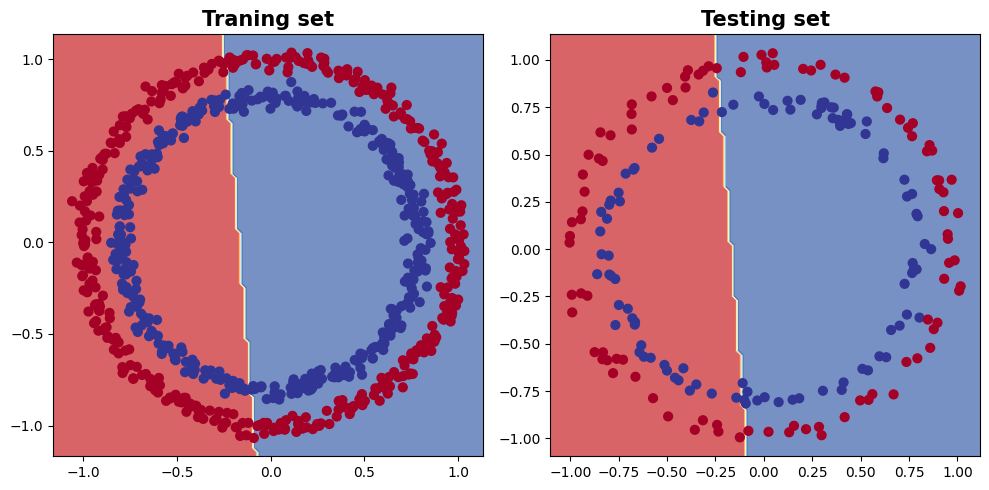

In [33]:
Display_Dcision_Boundary(Circle_Model ,X_train ,X_test ,y_train ,y_test)

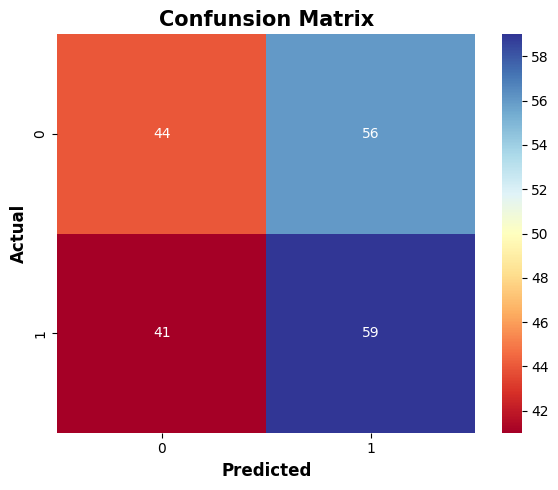


Conf_Matrix Output: 
[[44 56]
 [41 59]]

TN: 44 |FP: 56 |FN: 41 |TP: 59


In [34]:
y_preds ,_= Find_Predictions(Circle_Model ,X_test)
Diplay_Confusion_Matrix(y_test ,y_preds)

In [35]:
y_preds,_ = Find_Predictions(Circle_Model, X_test)
Display_Classification_Report(y_test ,y_preds)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.52      0.44      0.48       100
     Class 1       0.51      0.59      0.55       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200



In [36]:
_,y_probabilites = Find_Predictions(Circle_Model ,X_test)

In [37]:
def Display_Precision_Recall_Curve(Model ,y_test):
  _ ,y_probabilites = Find_Predictions(Model ,X_test)
  precisions ,recalls ,thresholds = precision_recall_curve(y_test.cpu().numpy() ,y_probabilites.cpu().numpy())

  # Plot Precision-Recall Curve
  plt.figure(figsize= (6,5) ,dpi=100)
  plt.plot(recalls ,precisions ,'b-',label='Precision-Recall')
  plt.xlabel("Recall" ,fontsize = 12 ,fontweight = 'bold')
  plt.ylabel("Precision" ,fontsize = 12 ,fontweight = 'bold')
  plt.title("Precision-Recall-Curve",fontsize = 15 ,fontweight ='bold')
  plt.grid(True, linestyle='-.', alpha=0.6)  # Add gridlines
  plt.legend(loc='best' ,fontsize = 12)

  plt.tight_layout() # Adjust layout to avoid overlapping text
  plt.show()

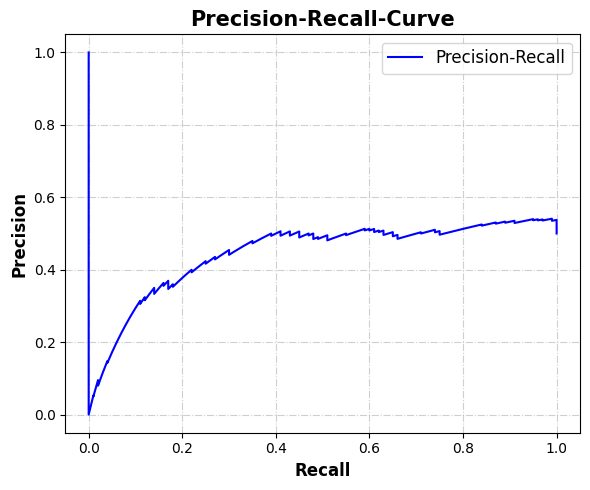

In [38]:
Display_Precision_Recall_Curve(Circle_Model ,y_test)

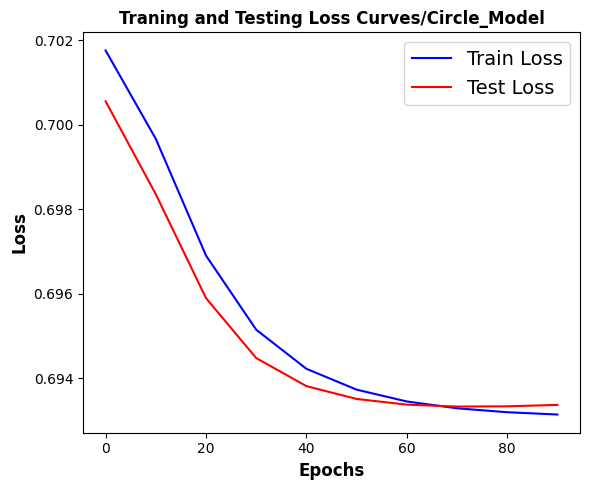

In [39]:
Display_train_test_loss_curves(epochs_count=epochs_count1 ,train_losses=train_loss_values1 ,test_losses=test_loss_values1 ,Model_name="Circle_Model")

# **◍ Step 4: Improve a model [from a model perspective]**

**!!! Note:**
* **We need to improve a model (from a model perspective).**

| Model Improvement Technique          | What Does It Do?                                                                                                                                                               |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **🏗️ Add more layers**                      | Each layer potentially increases the learning capabilities of the model, with each layer being able to learn new patterns in the data. More layers make the neural network deeper. |
| **➕ Add more hidden units**                | More hidden units per layer increase the model's learning capabilities. More hidden units make the neural network wider.                                                        |
| **⏳   Fitting for longer (more epochs)**     | Your model might learn more with more opportunities to look at the data by training for additional epochs.                                                                      |
| **🔄 Changing the activation functions**    | Using non-linear activation [__Power__ of __Non-linearity__] functions can help fit data that can't be represented with only straight lines.                                                                     |
| **⚙️ Change the learning rate**             | The learning rate controls how much the optimizer changes model parameters at each step. Too high a rate can cause overcorrection; too low can result in insufficient learning.  |
| **🎯 Change the loss function**            | Different problems require different loss functions. For example, binary cross-entropy loss is unsuitable for a multi-class classification problem.                             |

**🛠️ Let's Do That...**

In [40]:
# Generate Dataset
X ,y = make_circles(n_samples=1000 ,noise=0.03 ,random_state=42)
X[:5] ,y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

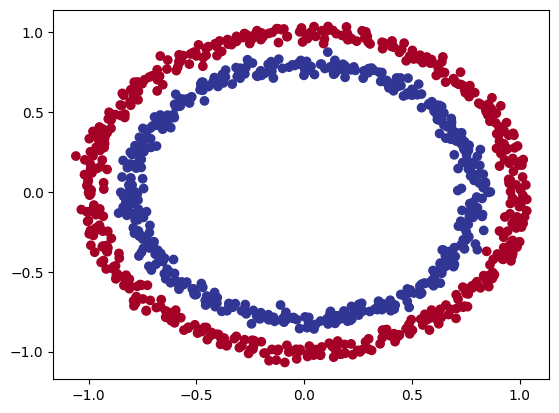

In [41]:
plt.scatter(X[:,0] ,X[:,1] ,c = y ,cmap = "RdYlBu")
plt.show()

In [42]:
# Convert data into tensors
X_tens = torch.from_numpy(X).type(torch.float)
y_tens = torch.from_numpy(y).type(torch.float)

# Split data
X_train ,X_test ,y_train ,y_test = train_test_split(X_tens ,y_tens ,test_size = 0.2 ,random_state=42)

# Build Model
# 1. Construct a model that subclasses nn.Module
class CircleModel_v2(nn.Module):
  def __init__(self):
    super(CircleModel_v2 ,self).__init__()
    # 2. Define 3 Linear layers and 1 relu layer
    self.fc1 = nn.Linear(in_features=2 ,out_features=10)
    self.fc2 = nn.Linear(in_features=10 ,out_features=10)
    self.fc3 = nn.Linear(in_features=10 ,out_features=1)
    self.relu = nn.ReLU() # Relu is a non-linear function

  # 3. Define forward function
  def forward(self ,x):
    return self.fc3(self.relu(self.fc2(self.relu(self.fc1(x)))))

# 4. Instantiate an instance of our model class and send it to the target device
Circle_Model2 = CircleModel_v2().to(device)
Circle_Model2

CircleModel_v2(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [43]:
Circle_Model2.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('fc1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('fc2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426, 

In [44]:
next(Circle_Model2.parameters()).device

device(type='cuda', index=0)

In [45]:
# Setup Loss Function and Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer2 = torch.optim.Adam(params=Circle_Model2.parameters() ,lr=0.1)

In [46]:
# Build Training / Test Loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data in target device
X_train ,y_train = X_train.to(device) ,y_train.to(device)
X_test ,y_test = X_test.to(device) ,y_test.to(device)

# Set the number of epochs (how many times the model will pass over the training data), this hyperparameter in ML.
epochs = 1000

# Track model values
epochs_count = []
test_loss_values = []
train_loss_values = []

### Training
for epoch in range(epochs):
  # Put Model in traning Mode
  Circle_Model2.train()

  # 1. Forward Pass
  train_logits = Circle_Model2(X_train).squeeze()
  train_preds = torch.round(torch.sigmoid(train_logits)) # row logits -> pred probabilities -> prediction labels

  # 2. Claculate the loss
  train_loss = criterion(train_logits ,y_train) # Recall Loss-Function(Input ,target)
  train_acc = accuracy_fun(y_true = y_train , y_preds=train_preds)

  # 3. Optimizer zero_grid
  optimizer2.zero_grad()

  # 4. Backpropagation
  train_loss.backward()

  # 5. Optimizer step
  optimizer2.step()

  ### Testing
  Circle_Model2.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = Circle_Model2(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # Calculate the loss
    test_loss = criterion(test_logits ,y_test)  # Recall Loss-Function(Input ,target)
    test_acc = accuracy_fun(y_true = y_test , y_preds=test_preds)

  # Show resultes per epoch
  if epoch % 100 == 0:
    epochs_count.append(epoch)
    test_loss_values.append(test_loss.detach().cpu().numpy()) # !!! Note: Convert from tensor to numpy array, we can use tensor.cpu().numpy() dirctly
    train_loss_values.append(train_loss.detach().cpu().numpy()) # !!! Note: Convert from tensor to numpy array
    print(f"Epoch: [{epoch}] - Train Accuracy: {train_acc:.3f}% - Train Loss: {train_loss:.3f} - Test Accuracy: {test_acc:.3f}% - Test Loss: {test_loss:.3f}")

Epoch: [0] - Train Accuracy: 50.000% - Train Loss: 0.693 - Test Accuracy: 50.000% - Test Loss: 0.694
Epoch: [100] - Train Accuracy: 100.000% - Train Loss: 0.002 - Test Accuracy: 100.000% - Test Loss: 0.007
Epoch: [200] - Train Accuracy: 100.000% - Train Loss: 0.001 - Test Accuracy: 100.000% - Test Loss: 0.005
Epoch: [300] - Train Accuracy: 100.000% - Train Loss: 0.000 - Test Accuracy: 100.000% - Test Loss: 0.005
Epoch: [400] - Train Accuracy: 100.000% - Train Loss: 0.000 - Test Accuracy: 100.000% - Test Loss: 0.006
Epoch: [500] - Train Accuracy: 100.000% - Train Loss: 0.000 - Test Accuracy: 100.000% - Test Loss: 0.005
Epoch: [600] - Train Accuracy: 100.000% - Train Loss: 0.000 - Test Accuracy: 100.000% - Test Loss: 0.005
Epoch: [700] - Train Accuracy: 100.000% - Train Loss: 0.000 - Test Accuracy: 100.000% - Test Loss: 0.005
Epoch: [800] - Train Accuracy: 100.000% - Train Loss: 0.000 - Test Accuracy: 100.000% - Test Loss: 0.006
Epoch: [900] - Train Accuracy: 100.000% - Train Loss: 0.000

**Let's Visualize our model.**

In [47]:
y_preds ,y_props = Find_Predictions(Circle_Model2 ,X_test)
y_preds[:5] ,y_props[:5]

(tensor([1., 0., 1., 0., 1.], device='cuda:0'),
 tensor([1.0000e+00, 4.5136e-08, 1.0000e+00, 5.9914e-11, 9.9983e-01],
        device='cuda:0'))

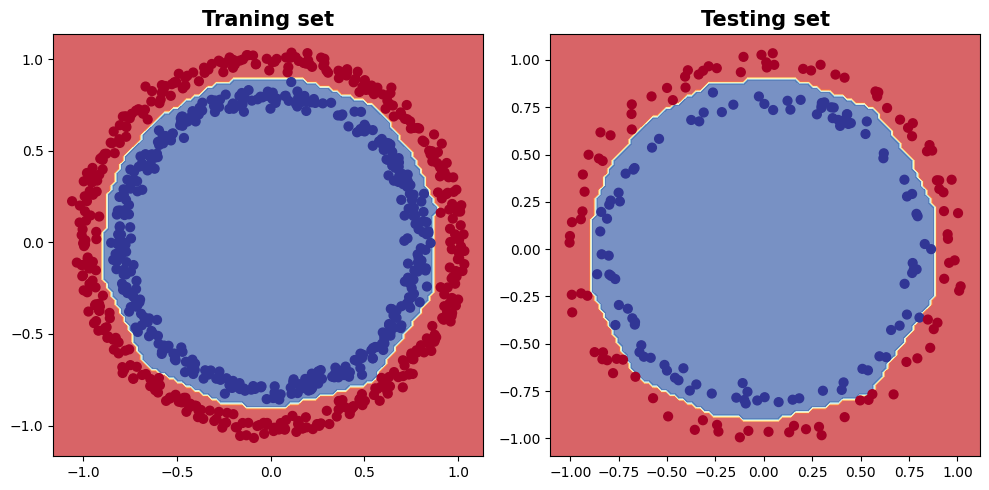

In [48]:
Display_Dcision_Boundary(Circle_Model2 ,X_train ,X_test ,y_train ,y_test)

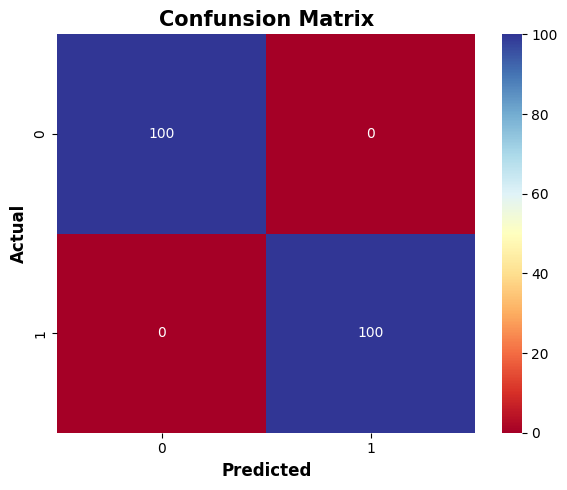


Conf_Matrix Output: 
[[100   0]
 [  0 100]]

TN: 100 |FP: 0 |FN: 0 |TP: 100


In [49]:
Diplay_Confusion_Matrix(y_test ,y_preds)

In [50]:
Display_Classification_Report(y_test ,y_preds)

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       100
     Class 1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



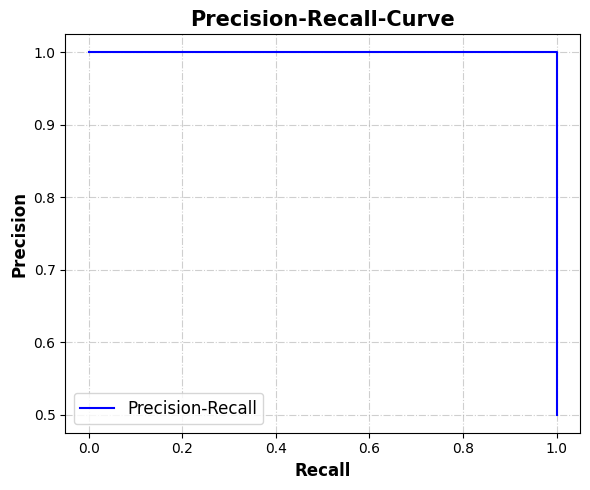

In [51]:
Display_Precision_Recall_Curve(Circle_Model2 ,y_test)

**Visuals Train and Test Losses Curves.**

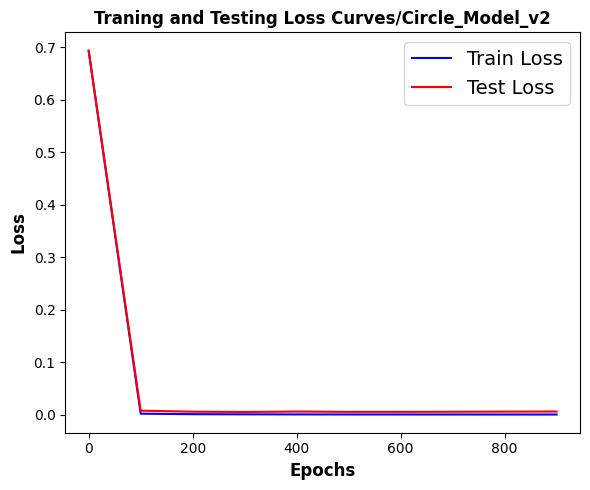

In [52]:
Display_train_test_loss_curves(epochs_count = epochs_count ,train_losses = train_loss_values ,test_losses = test_loss_values ,Model_name="Circle_Model_v2")

<a id="Import"></a>
<p style="background-color: #000000; font-family: 'Verdana', sans-serif; color: #FFFFFF; font-size: 160%; text-align: center; border-radius: 25px; padding: 12px 20px; margin-top: 20px; border: 2px solid transparent; background-image: linear-gradient(black, black), linear-gradient(45deg, #FF00FF, #00FFFF, #FFFF00, #FF4500); background-origin: border-box; background-clip: content-box, border-box; box-shadow: 0px 4px 20px rgba(255, 105, 180, 0.8);">
   Thanks & Upvote ❤️</p>